In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import genfromtxt  
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

### Datasets

In [2]:
def load_iris():
    '''
    Returns a column of all petal lengths.
    '''
    X = genfromtxt("./data/iris.csv", delimiter=',', skip_header=1)
    X = X[:,2]
    X = X.reshape(-1,1)
    return X

def load_bdp():
    '''
    Returns a column of systolic and diastolic blood pressure values.
    '''
    Z = genfromtxt("./data/bdp.csv", delimiter=',', skip_header=1)
    n = Z.shape[0]
    X = np.zeros(2*n)
    X[:n] = Z[:,2]
    X[n:] = Z[:,3]
    X = X.reshape(-1,1)
    return X

def sample(pi, mu, std, n):
    '''
    Returns a column of n values drawn from a normal mixture model.
    
    Parameter
        pi  k mixing coefficients
        mu  k means
        std k standard deviations
        n   number of data points
        
    Return
        n data points randomly sampled from specified mixture. 
    '''
    y = np.random.choice(len(pi), size=n, p=pi)
    x = np.zeros((n,1))
    for i, comp in enumerate(y):
        x[i] = norm.rvs(mu[comp], std[comp])
    return x


### Examples

In [3]:
# generate n points from a mixture of fived normal distributions
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

In [4]:
# load petal lengths of iris flowers
iris = load_iris()

In [5]:
# load blood pressures
bdp = load_bdp()

## Distribution of Data

### Iris data

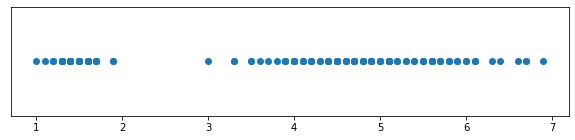

In [19]:
# show data
plt.subplots(figsize=(10,2))
plt.scatter(iris, np.zeros((len(iris),1)))
plt.yticks(())
plt.show()

### Blood preasure data

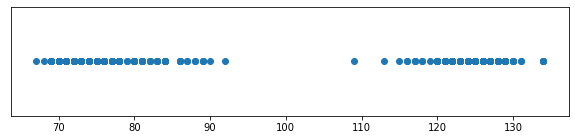

In [15]:
plt.subplots(figsize=(10,2))
plt.scatter(bdp, np.zeros((len(bdp),1)))
plt.yticks(())
plt.show()

### Sample data

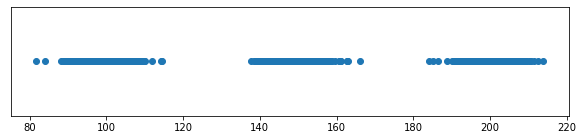

In [18]:
plt.subplots(figsize=(10,2))
plt.scatter(samp, np.zeros((len(samp),1)))
plt.yticks(())
plt.show()

## Iris Dataset


599.0256713829931


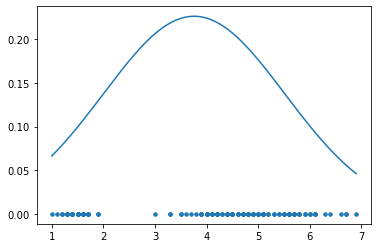

413.02924652878994


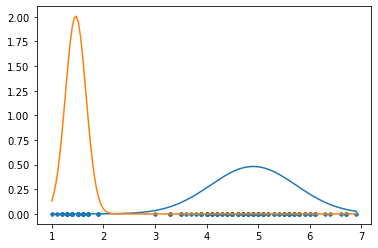

417.54235979120483


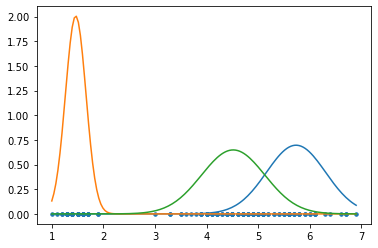

423.64291408782304


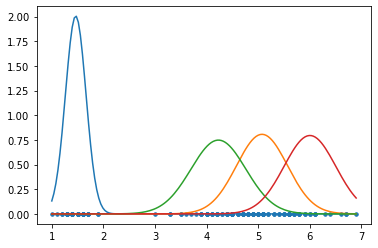

426.2169225341678


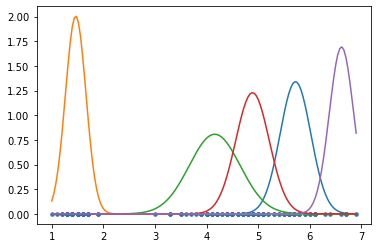

431.1824230969952


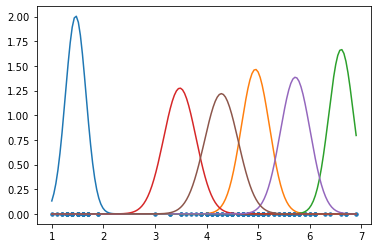

435.8616470555621


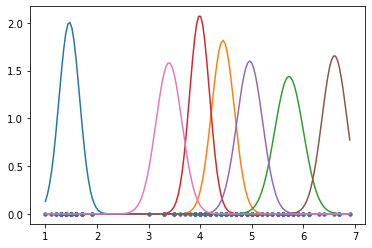

440.87794460845646


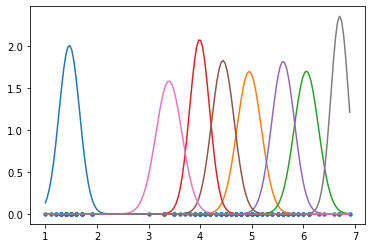

445.71759993293915


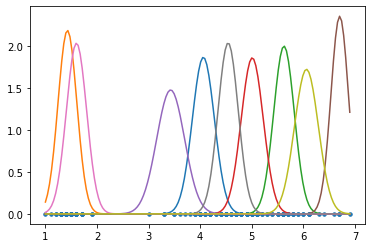

451.2457830563611


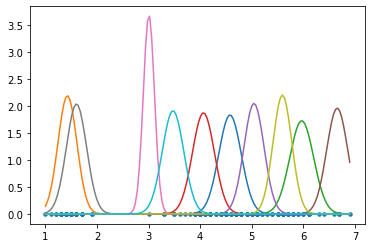

457.26743899271696


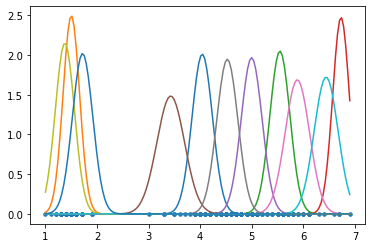

462.567647420209


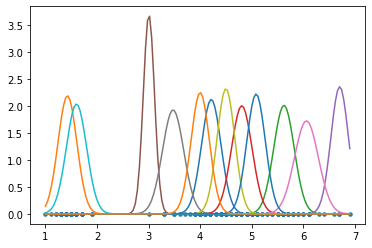

468.07860904953895


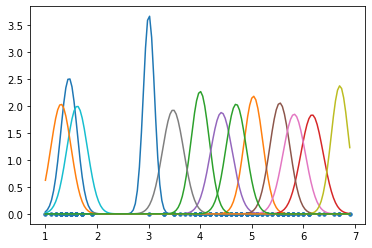

474.01972776443716


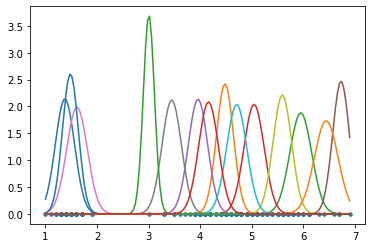

479.69973098809214


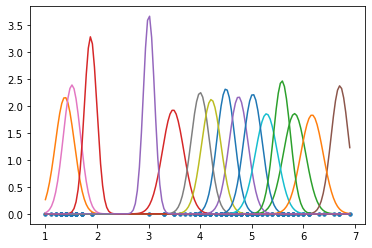

Smallest AIC (Iris): 413.03


In [11]:
iris = load_iris()

aic = []

x_axis = np.linspace(np.min(iris), np.max(iris), iris.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-2)
    gm.fit(iris)
    aic_iris = gm.aic(iris)
    print(aic_iris)
    aic.append(aic_iris)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(iris, np.zeros((len(iris), 1)), s=12)
    plt.show();

print(f'Smallest AIC (Iris): {min(aic):.2f}')

## Blood Preasure Dataset

2790.4060203299773


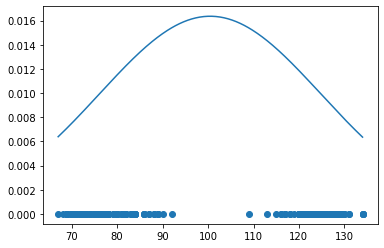

2203.917172852727


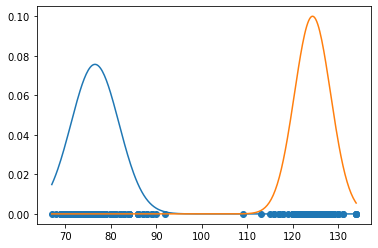

2187.8344972499503


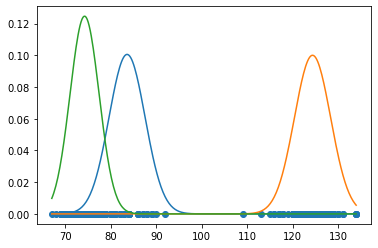

2185.9709377066024


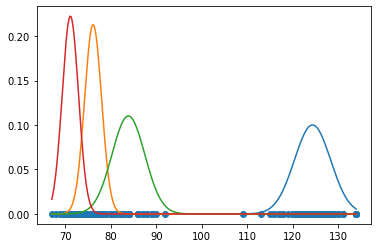

2187.0066674019913


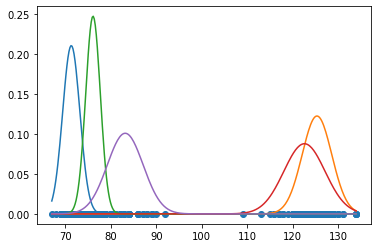

2178.892983770667


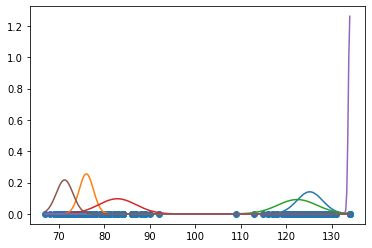

2176.6792926543826


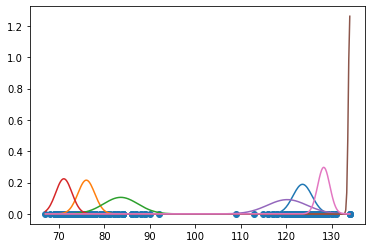

2173.845482434881


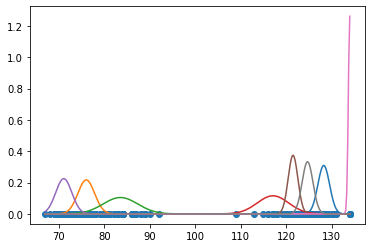

2173.808704606179


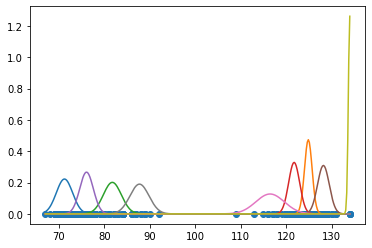

2173.5539446827875


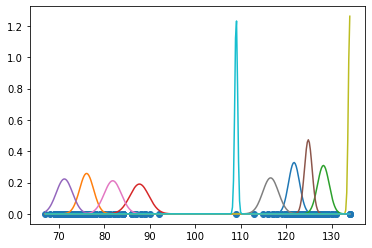

2178.574386192746


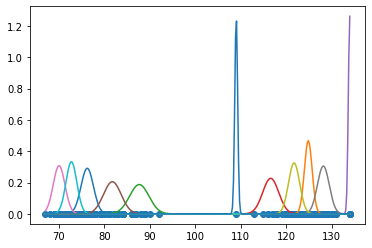

2182.850815787432


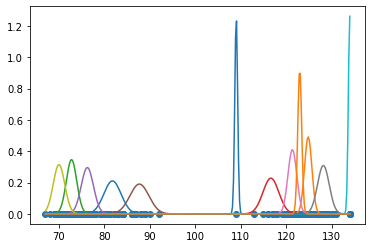

2184.2900222488975


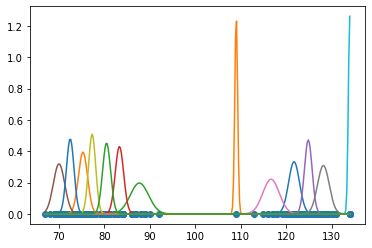

2188.2046537797496


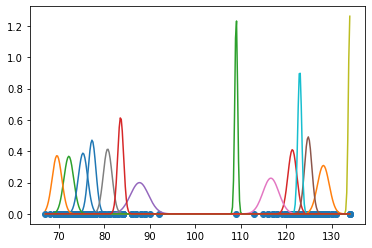

2191.9285321178436


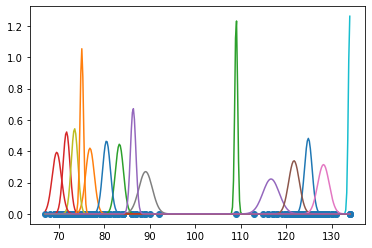

Smallest AIC (BDP): 2173.55


In [12]:
bdp = load_bdp()
aic = []

x_axis = np.linspace(np.min(bdp), np.max(bdp), bdp.shape[0])
for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, random_state=32, init_params = 'kmeans', reg_covar = 1e-1)
    gm.fit(bdp)
    aic_bdp = gm.aic(bdp)
    print(aic_bdp)
    aic.append(aic_bdp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(bdp, np.zeros((len(bdp), 1)))
    plt.show();
    
print(f'Smallest AIC (BDP): {min(aic):.2f}')

## Sample Dataset

In [9]:
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
samp = sample(pi, mu, std, n)

10272.925928891455


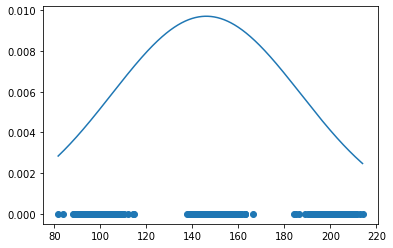

9438.723394696066


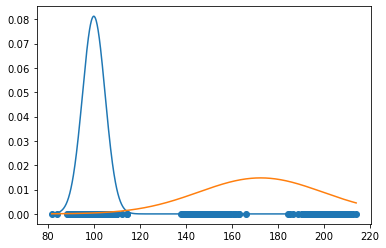

8277.058945995583


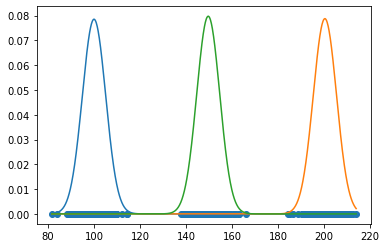

8282.491622318317


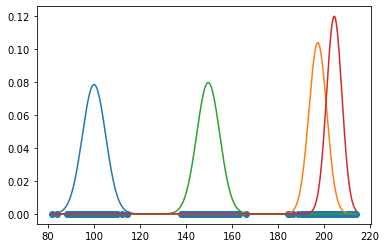

8285.27071597982


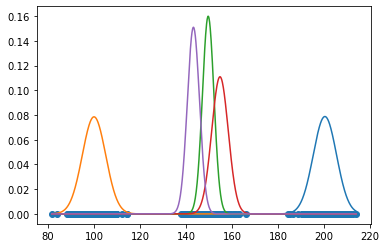

8289.860772673612


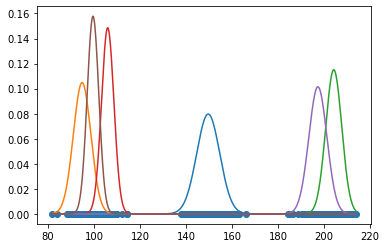

8293.187469061


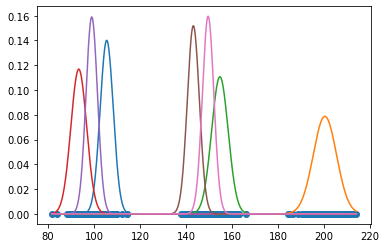

8297.331701215135


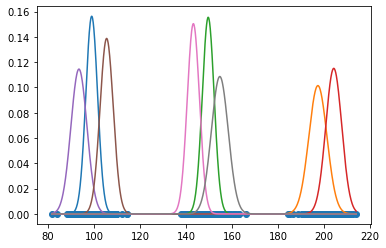

8299.945145529095


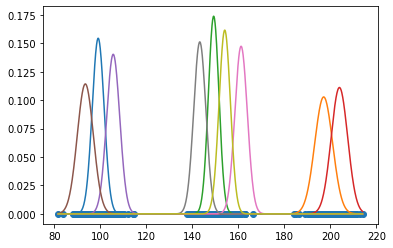

8287.59307309576


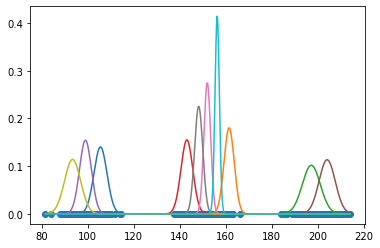

8293.749340650982


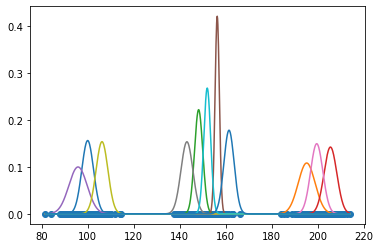

8297.962827404946


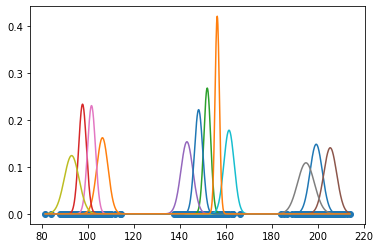

8296.171343883198


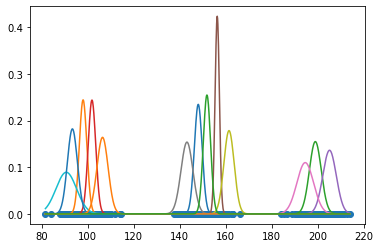

8296.032658113592


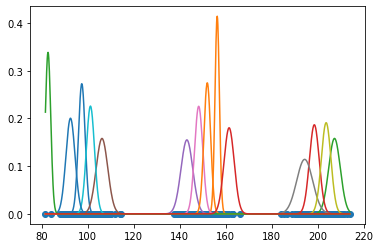

8300.448100903222


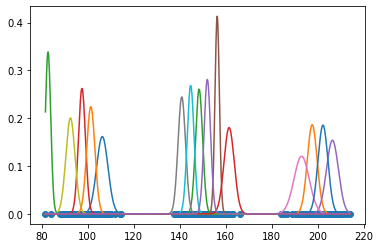

Smallest AIC (Sample): 8277.06


In [13]:
x_axis = np.linspace(np.min(samp), np.max(samp), samp.shape[0])
aic = []

for k in range(1, 16):
    gm = GaussianMixture(n_components=k, n_init=100, init_params = 'kmeans', random_state = 42, reg_covar = 1e-1)
    gm.fit(samp)
    aic_samp = gm.aic(samp)
    print(aic_samp)
    aic.append(aic_samp)
    
    mean = gm.means_.reshape(-1)
    std = gm.covariances_.reshape(-1)
    for i in range(k):
        plt.plot(x_axis, stats.norm.pdf(x_axis, mean[i], std[i]**0.5).reshape(-1))
    plt.scatter(samp, np.zeros((len(samp), 1)))
    plt.show();
    
print(f'Smallest AIC (Sample): {min(aic):.2f}')